#### CNN with Keras Example
#### In reference to Eijaz Allibhai's CNN model, (I tweaked it a bit since there were errors with his previous outdated code, like changing the pre-processing code)
##### This is an example of machine learning model of using the keras library and its datasets to use to build a simple convolutional neural network. A great way to use deep learning to classify images is to build a convolutional neural network (CNN). The Keras library in Python makes it pretty simple to build a CNN.Computers see images using pixels. Pixels in images are usually related. For example, a certain group of pixels may signify an edge in an image or some other pattern. Convolutions use this to help identify images. A convolution multiplies a matrix of pixels with a filter matrix or ‘kernel’ and sums up the multiplication values. Then the convolution slides over to the next pixel and repeats the same process until all the image pixels have been covered. 

#### Loading the dataset
##### We first start off with loading the mnist dataset. It is a dataset used in many machine learning and deep learning processes.The mnist dataset is conveniently provided to us as part of the Keras library, so we can easily load the dataset. Out of the 70,000 images provided in the dataset, 60,000 are given for training and 10,000 are given for testing. When we load the dataset below, X_train and X_test will contain the images, and y_train and y_test will contain the digits that those images represent.

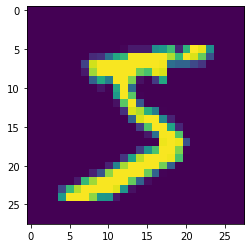

In [2]:
%matplotlib inline
#load libraries
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
import matplotlib.pyplot as plt
#we'd also like to view and see the images 
plt.imshow(X_train[0])

In [3]:
#check the total data in each x train and y train
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)


In [4]:
#We can check the image shape here
X_train[0].shape


(28, 28)

##### By default, the shape of every image in the mnist dataset is 28 x 28, so we will not need to check the shape of all the images. When using real-world datasets, you may not be so lucky. 28 x 28 is also a fairly small size, so the CNN will be able to run over each image pretty quickly.
#### Data Pre-Processing 
##### Here we start the pre-processing process. We need to reshape our inputted images (X_train and X_test) to the shape that our model expects when we train the model. The number of images that we will select for training is 60k, while testing we will use 10k images


In [5]:
#reshape the images to fit our model
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28 , 1)
#we then normalize the pixel values to range 0-1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255


##### We then add a new dimension to the y_train value. The expected shape of y_train should have a second dimension of 1, since it contains the labels for each image in 'x'_train. Therefore, we need to add a new dimension to 'y' train to make it compatible with x train.

#### One Hot Encoding
##### We will need to apply one hot encoding here. One-hot encoding in machine learning is the conversion of categorical information into a format that may be fed into machine learning algorithms to improve prediction accuracy. One-hot encoding is a common method for dealing with categorical data in machine learning. We can import the keras categorical function here to change the format for it.


In [6]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### Building the CNN model
##### Now after one-hot encoding, we are ready to build the CNN model. Here, I have used some libraries and functions from the keras library.
##### The keras sequential class/function groups a linear stack of layers into a keras model. Sequential provides training and inference features on this model. A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor. 
##### The conv2d layer is the key for the convolution process. 2D convolution layer (e.g. spatial convolution over images). This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. If use_bias is True, a bias vector is created and added to the outputs. Finally, if activation is not None, it is applied to the outputs as well.
##### The dense class/dense function is used here to be the layer type that we will use in for our output layer. Dense is a standard layer type that is used in many cases for neural networks.

In [7]:
#import the keras, models, layers
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, Flatten


#We now can create the model ourselves
#we initiate the model as a variable to the sequential function
cnn_model = Sequential()

#The sequential model will contain many convolutional layers, dense layers, flatten layers as well.
#We add the model layers here
cnn_model.add(Conv2D(64, kernel_size = 3, activation = 'relu', input_shape = (28, 28, 1)))
cnn_model.add(Conv2D(32, kernel_size = 3, activation = 'relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=10, activation='softmax'))


##### We use the ‘add()’ function to add layers to our model. Our first 2 layers are Conv2D layers. These are convolution layers that will deal with our input images, which are seen as 2-dimensional matrices.64 in the first layer and 32 in the second layer are the number of nodes in each layer. This number can be adjusted to be higher or lower, depending on the size of the dataset. In our case, 64 and 32 work well
##### Kernel size is the size of the filter matrix for our convolution. a kernel size of 3 means we have a kernel size of a 3x3 matrix.
##### Activation is the activation function for the layer. The activation function that will be used ehre is ReLU or 'Rectified Linear Activation'
##### usage of ReLU helps to prevent the exponential growth in the computation required to operate the neural network. If the CNN scales in size, the computational cost of adding extra ReLUs increases linearly.
##### In between the Conv2D layers and the dense layer, there is a ‘Flatten’ layer. Flatten serves as a connection between the convolution and dense layers.
##### There will be 10 nodes in the output layer. 


### Compiling the model 
##### Next, we need to compile our model. Compiling the model takes three parameters: optimizer, loss and metrics.
##### The optimizer controls the learning rate. We will be using ‘adam’ as our optmizer. Adam is generally a good optimizer to use for many cases. The adam optimizer adjusts the learning rate throughout training.
##### The learning rate determines how fast the optimal weights for the model are calculated. A smaller learning rate may lead to more accurate weights (up to a certain point), but the time it takes to compute the weights will be longer. We will use ‘categorical_crossentropy’ for our loss function. This is the most common choice for classification. A lower score indicates that the model is performing better.To make things even easier to interpret, we will use the ‘accuracy’ metric to see the accuracy score on the validation set when we train the model.

##### We will also be using categorical_crossentropy for the loss function. It is the most common choice for classification. A lower score implies that the model id performing better. 

In [8]:
#here, we compile the model using accuracy to measure the model performance
cnn_model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Training the Model
##### To train the model, we will use the fit() function on our model with the train X variables, target data which is the output (train y), and the number of epochs
##### epochs refer to the number of times the model will cycle through the data. The more epochs are ran, the more the model will improve up to a certain point.
##### Let's test the model and use 4 epochs



In [9]:
# train the model
#make it a history variable to plot it
history = cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1222 - accuracy: 0.9631 - val_loss: 0.0493 - val_accuracy: 0.9847
Epoch 2/3
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0450 - accuracy: 0.9866 - val_loss: 0.0488 - val_accuracy: 0.9853
Epoch 3/3
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0300 - accuracy: 0.9903 - val_loss: 0.0389 - val_accuracy: 0.9877


### Plotting the training model
##### Here I will be plotting the training process. We can use matplotlib to plot it, and then I can use the history object returned by the fit() method to access the validation loss and accuray values for each epoch.

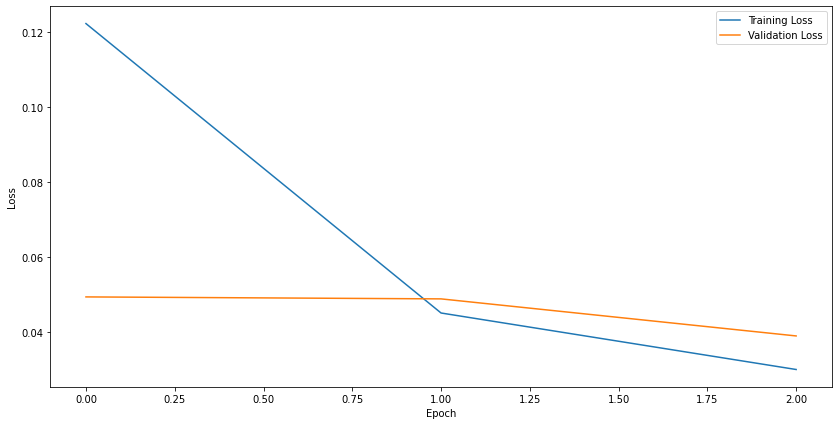

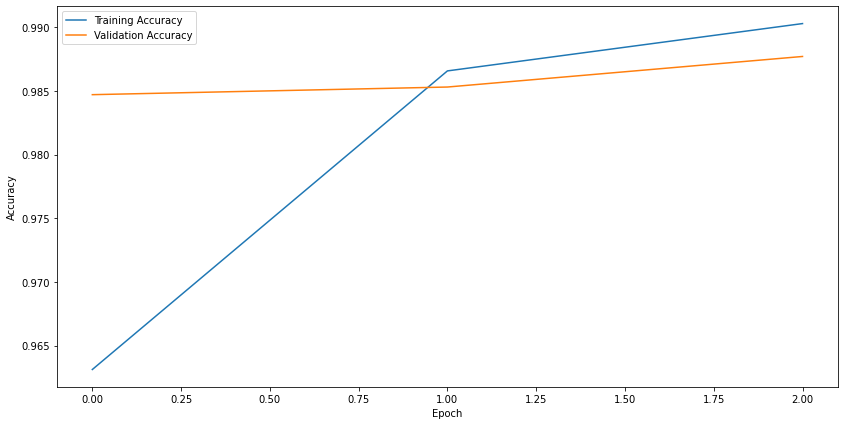

In [10]:
#we now will plot the training and validatin loss per epoch. The bottom part of the code will plot the validation accuracy per epoch.
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Making Predictions
#### We can now test and predict the images with the model. The predict function will give an array with 10 numbers. These numbers are the probabilities that the input image represents each digit (0-9).

1/1 [==============================] - 0s 21ms/step


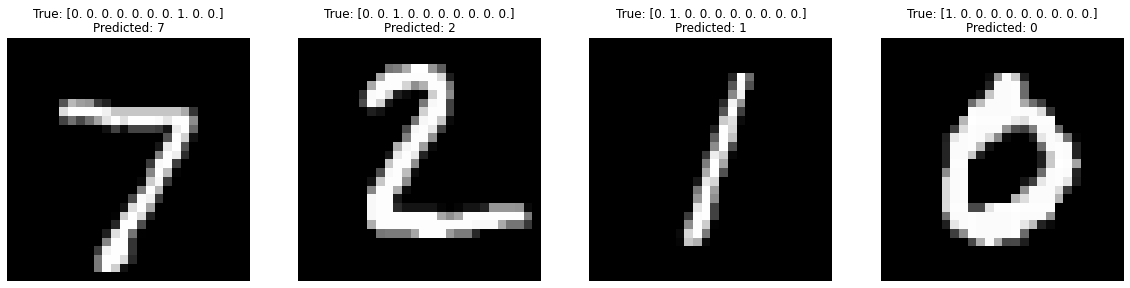

In [28]:
#predict the first 4 images in the test set
import numpy as np
predicted_labels = cnn_model.predict(X_test[:4])

#convert the one-hot encoded labels to integer labels
predicted_labels = np.argmax(predicted_labels, axis=1)

#Plot the images along with their true and predicted labels
fig, axs = plt.subplots(1, 4, figsize=(20, 10))
for i in range(4):
    axs[i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f"True: {y_test[i]}\nPredicted: {predicted_labels[i]}")
plt.show()



##### We can plot the prediction of the cnn here to visualize the prediction

##### Now lets compare it to the actual results and plot it as well
##### This code here will display the plotted predicted y test image, along with their actual and predicted labels. The 'class_names' list contains the names of ten classes
##### The np argmax is a function that returns the indices of the maximum values along an axis. If the input is a multi-dimensional array, 'argmax' returns the indices of the maximum value along a specified axis. In this case, the predicted output of the CNN model is a probability distribution over the 10 classes (digits 0 to 9). The np.argmax function is used to find the index of the class with the highest probability, which corresponds to the predicted digit for each of the first 4 images in the test set. 

1/1 [==============================] - 0s 22ms/step


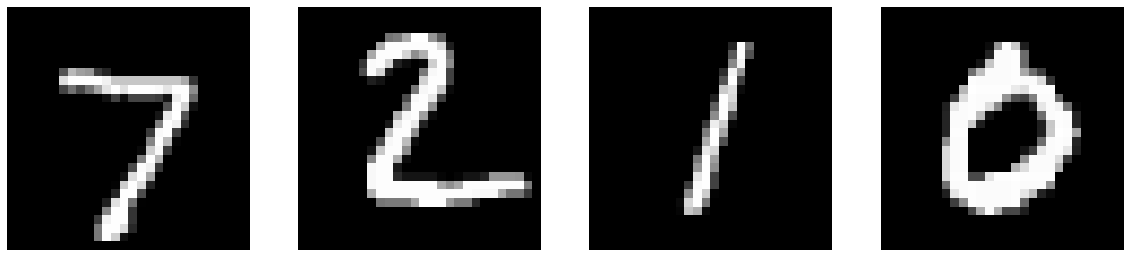

In [31]:
#actual results for first 4 images in test set
actual = y_test[:4]

#predicted results for first 4 images in test set
predicted_classes = cnn_model.predict(X_test[:4])
#get the class names
true_classes = y_test[:4].argmax(axis=-1)

# plot the images with their predicted and true class labels
fig, axes = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axes.flat):
    # plot the image
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    axs[i].set_title(f"True: {y_test[i]}\nActual: {true_classes[i]}")
# show the plot
plt.show()
    



